In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from glob import glob
from os.path import join as pathjoin
import h5py
import time

import imp
import donglab_workflows as dw
imp.reload(dw)
import PIL.Image as Image
Image.MAX_IMAGE_PIXELS = None
import tifffile as tf # for 16 bit tiff

# downsample lightsheet

The mit data is stored in tif stacks
the size is
Image resolution is 1.8 µm x 1.8 µm x 2.0 µm (xyz), and the stack can be found at our network storage space at BMAP.



In [2]:
# filename
# note there are a few datasets here
input_directory = '/media/dtward/YangLab_5TB_WDBlue/Camk2a-MORF3_20-1_4x/SYTO16_488/086780_109130'

output_filename = None # generate automatically if None

# we need a temporary output directory for intermediate results (each slice)
outdir = 'donglab_morf_v00c'

dI = np.array([2.0,1.8,1.8]) # we need to input the voxel size, slice thickness first, in microns
res = 50.0
dataset_string = '' # this is not used for tifs


In [3]:
if output_filename is None:
    output_filename = os.path.splitext(os.path.split(input_directory)[-1])[0] + '_down.npz'
output_filename = 'SYTO16_488_086780_109130_down.npz'    

print(f'Input directory is {input_directory}')
print(f'Output filename is {output_filename}')
print(f'Resolution is {dI}')
print(f'Desired resolution is {res}')
print(f'Dataset string is {dataset_string}')

# temporary output dir
if not os.path.exists(outdir):
    os.mkdir(outdir)

Input directory is /media/dtward/YangLab_5TB_WDBlue/Camk2a-MORF3_20-1_4x/SYTO16_488/086780_109130
Output filename is SYTO16_488_086780_109130_down.npz
Resolution is [2.  1.8 1.8]
Desired resolution is 50.0
Dataset string is 


In [4]:
# I want 50 micron
down = np.floor(res/dI).astype(int)
print(f'Downsampling factors are {down}')
print(f'Downsampled res {dI*down}')

Downsampling factors are [25 27 27]
Downsampled res [50.  48.6 48.6]


In [5]:
# build a tif class with similar interface
class TifStack:
    '''We need a tif stack with an interface that will load a slice one at a time
    We assume each tif has the same size
    We assume 16
    '''
    def __init__(self,input_directory,pattern='*.tif'):
        self.input_directory = input_directory
        self.pattern = pattern
        self.files = glob(pathjoin(input_directory,pattern))
        self.files.sort()
        test = Image.open(self.files[0])
        self.nxy = test.size
        test.close()
        self.nz = len(self.files)
        self.shape = (self.nz,self.nxy[1],self.nxy[0]) # note, it is xy not rowcol
    def __getitem__(self,i):
        return tf.imread(self.files[i])/(2**16-1)
    def __len__(self):
        return len(self.files)
    def close(self):
        pass # nothing necessary
    


In [6]:
# load the data
data = TifStack(input_directory)

In [7]:
print(f'Dataset shape {data.shape}')

Dataset shape (3555, 10294, 7442)


In [8]:
nI = np.array(data.shape)
xI = [np.arange(n)*d - (n-1)/2.0*d for n,d in zip(nI,dI)]

In [9]:
xId = [dw.downsample(x,[d]) for x,d in zip(xI,down)]
dId = [x[1]-x[0] for x in xId]

In [10]:
dId

[50.0, 48.600000000000364, 48.599999999999454]

<IPython.core.display.Javascript object>


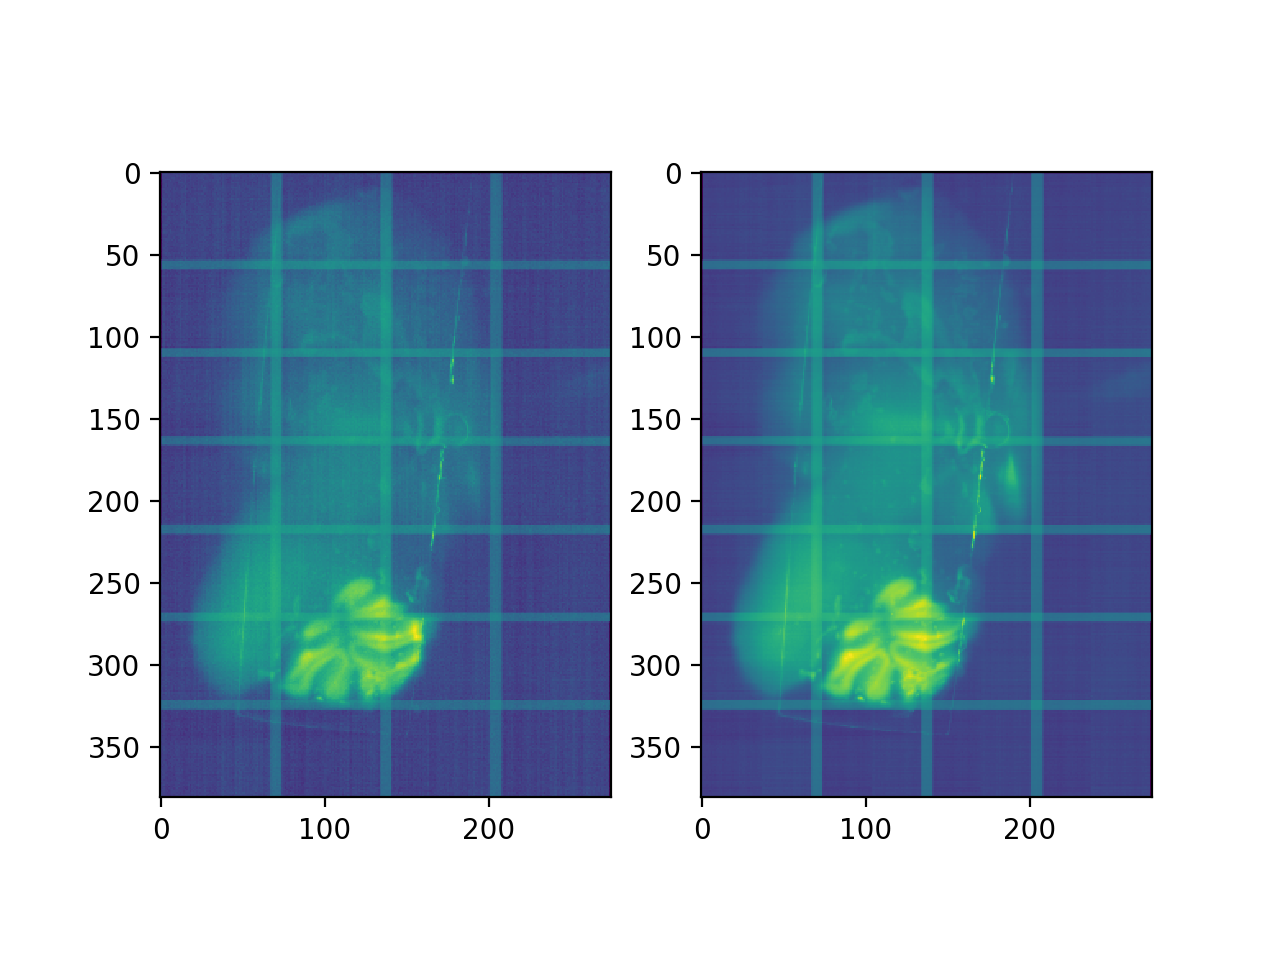

Finished loading slice 0 of 3555, time 4.246633052825928 s
Finished loading slice 1 of 3555, time 4.053606033325195 s
Finished loading slice 2 of 3555, time 4.03422999382019 s
Finished loading slice 3 of 3555, time 3.914738416671753 s
Finished loading slice 4 of 3555, time 3.8054537773132324 s
Finished loading slice 5 of 3555, time 3.8918323516845703 s
Finished loading slice 6 of 3555, time 3.9066498279571533 s
Finished loading slice 7 of 3555, time 3.8666672706604004 s
Finished loading slice 8 of 3555, time 4.017625331878662 s
Finished loading slice 9 of 3555, time 3.996860980987549 s
Finished loading slice 10 of 3555, time 4.011873722076416 s
Finished loading slice 11 of 3555, time 3.840555429458618 s
Finished loading slice 12 of 3555, time 3.9929628372192383 s
Finished loading slice 13 of 3555, time 3.7785565853118896 s
Finished loading slice 14 of 3555, time 4.039574861526489 s
Finished loading slice 15 of 3555, time 3.8349497318267822 s
Finished loading slice 16 of 3555, time 4.01

Finished loading slice 136 of 3555, time 4.2056427001953125 s
Finished loading slice 137 of 3555, time 4.594896078109741 s
Finished loading slice 138 of 3555, time 4.362277984619141 s
Finished loading slice 139 of 3555, time 3.9981191158294678 s
Finished loading slice 140 of 3555, time 3.9173543453216553 s
Finished loading slice 141 of 3555, time 3.862213134765625 s
Finished loading slice 142 of 3555, time 4.127243757247925 s
Finished loading slice 143 of 3555, time 4.02325701713562 s
Finished loading slice 144 of 3555, time 3.9399588108062744 s
Finished loading slice 145 of 3555, time 4.003538370132446 s
Finished loading slice 146 of 3555, time 4.209903001785278 s
Finished loading slice 147 of 3555, time 4.374661445617676 s
Finished loading slice 148 of 3555, time 4.162074089050293 s
Finished loading slice 149 of 3555, time 4.242080926895142 s
Finished loading slice 150 of 3555, time 4.084400653839111 s
Finished loading slice 151 of 3555, time 3.887004852294922 s
Finished loading slic

Finished loading slice 271 of 3555, time 4.0179808139801025 s
Finished loading slice 272 of 3555, time 4.250606060028076 s
Finished loading slice 273 of 3555, time 4.088518857955933 s
Finished loading slice 274 of 3555, time 3.92034912109375 s
Finished loading slice 275 of 3555, time 3.9348347187042236 s
Finished loading slice 276 of 3555, time 3.972162961959839 s
Finished loading slice 277 of 3555, time 4.195688724517822 s
Finished loading slice 278 of 3555, time 3.9893798828125 s
Finished loading slice 279 of 3555, time 4.04300856590271 s
Finished loading slice 280 of 3555, time 4.083770036697388 s
Finished loading slice 281 of 3555, time 4.307458877563477 s
Finished loading slice 282 of 3555, time 4.497549295425415 s
Finished loading slice 283 of 3555, time 4.629256963729858 s
Finished loading slice 284 of 3555, time 4.431313753128052 s
Finished loading slice 285 of 3555, time 4.023294925689697 s
Finished loading slice 286 of 3555, time 3.807704448699951 s
Finished loading slice 287

Finished loading slice 406 of 3555, time 4.497535228729248 s
Finished loading slice 407 of 3555, time 4.298546075820923 s
Finished loading slice 408 of 3555, time 4.01756739616394 s
Finished loading slice 409 of 3555, time 4.082496881484985 s
Finished loading slice 410 of 3555, time 4.153569221496582 s
Finished loading slice 411 of 3555, time 4.018065929412842 s
Finished loading slice 412 of 3555, time 4.0254106521606445 s
Finished loading slice 413 of 3555, time 4.018096446990967 s
Finished loading slice 414 of 3555, time 4.14072322845459 s
Finished loading slice 415 of 3555, time 3.814938545227051 s
Finished loading slice 416 of 3555, time 3.9679863452911377 s
Finished loading slice 417 of 3555, time 5.9110589027404785 s
Finished loading slice 418 of 3555, time 4.132769823074341 s
Finished loading slice 419 of 3555, time 4.0716233253479 s
Finished loading slice 420 of 3555, time 4.125210523605347 s
Finished loading slice 421 of 3555, time 4.051852703094482 s
Finished loading slice 42

Finished loading slice 540 of 3555, time 4.260922193527222 s
Finished loading slice 541 of 3555, time 4.167585611343384 s
Finished loading slice 542 of 3555, time 4.724757194519043 s
Finished loading slice 543 of 3555, time 3.902437448501587 s
Finished loading slice 544 of 3555, time 4.012014150619507 s
Finished loading slice 545 of 3555, time 4.797433137893677 s
Finished loading slice 546 of 3555, time 4.3138227462768555 s
Finished loading slice 547 of 3555, time 4.372338056564331 s
Finished loading slice 548 of 3555, time 4.207089424133301 s
Finished loading slice 549 of 3555, time 4.124963045120239 s
Finished loading slice 550 of 3555, time 4.44144606590271 s
Finished loading slice 551 of 3555, time 4.507674694061279 s
Finished loading slice 552 of 3555, time 4.409128904342651 s
Finished loading slice 553 of 3555, time 4.034700155258179 s
Finished loading slice 554 of 3555, time 4.165307998657227 s
Finished loading slice 555 of 3555, time 4.0429253578186035 s
Finished loading slice 

Finished loading slice 675 of 3555, time 4.447203636169434 s
Finished loading slice 676 of 3555, time 4.171037673950195 s
Finished loading slice 677 of 3555, time 4.406622886657715 s
Finished loading slice 678 of 3555, time 4.377890348434448 s
Finished loading slice 679 of 3555, time 4.4118812084198 s
Finished loading slice 680 of 3555, time 4.404917240142822 s
Finished loading slice 681 of 3555, time 4.464181184768677 s
Finished loading slice 682 of 3555, time 4.413187503814697 s
Finished loading slice 683 of 3555, time 4.9299705028533936 s
Finished loading slice 684 of 3555, time 4.215783357620239 s
Finished loading slice 685 of 3555, time 4.669818639755249 s
Finished loading slice 686 of 3555, time 4.281972169876099 s
Finished loading slice 687 of 3555, time 4.464818000793457 s
Finished loading slice 688 of 3555, time 4.513885259628296 s
Finished loading slice 689 of 3555, time 4.254149436950684 s
Finished loading slice 690 of 3555, time 5.4320433139801025 s
Finished loading slice 6

Finished loading slice 810 of 3555, time 4.167719125747681 s
Finished loading slice 811 of 3555, time 4.364740610122681 s
Finished loading slice 812 of 3555, time 4.179542779922485 s
Finished loading slice 813 of 3555, time 4.39432430267334 s
Finished loading slice 814 of 3555, time 4.40473747253418 s
Finished loading slice 815 of 3555, time 4.253634691238403 s
Finished loading slice 816 of 3555, time 4.182457685470581 s
Finished loading slice 817 of 3555, time 4.829002141952515 s
Finished loading slice 818 of 3555, time 4.479970693588257 s
Finished loading slice 819 of 3555, time 3.9041762351989746 s
Finished loading slice 820 of 3555, time 5.32958459854126 s
Finished loading slice 821 of 3555, time 4.255066871643066 s
Finished loading slice 822 of 3555, time 4.499031066894531 s
Finished loading slice 823 of 3555, time 4.264737367630005 s
Finished loading slice 824 of 3555, time 4.850956678390503 s
Finished loading slice 825 of 3555, time 4.171637058258057 s
Finished loading slice 826

Finished loading slice 945 of 3555, time 4.8759424686431885 s
Finished loading slice 946 of 3555, time 4.236426591873169 s
Finished loading slice 947 of 3555, time 4.307020425796509 s
Finished loading slice 948 of 3555, time 4.359364032745361 s
Finished loading slice 949 of 3555, time 4.347737073898315 s
Finished loading slice 950 of 3555, time 4.0669167041778564 s
Finished loading slice 951 of 3555, time 4.46224045753479 s
Finished loading slice 952 of 3555, time 4.4997334480285645 s
Finished loading slice 953 of 3555, time 4.113293647766113 s
Finished loading slice 954 of 3555, time 4.449975252151489 s
Finished loading slice 955 of 3555, time 4.441741228103638 s
Finished loading slice 956 of 3555, time 4.117593765258789 s
Finished loading slice 957 of 3555, time 4.337674856185913 s
Finished loading slice 958 of 3555, time 4.2253429889678955 s
Finished loading slice 959 of 3555, time 4.520832538604736 s
Finished loading slice 960 of 3555, time 4.371830940246582 s
Finished loading slic

Finished loading slice 1078 of 3555, time 4.546004056930542 s
Finished loading slice 1079 of 3555, time 4.378917455673218 s
Finished loading slice 1080 of 3555, time 4.27515172958374 s
Finished loading slice 1081 of 3555, time 4.306759595870972 s
Finished loading slice 1082 of 3555, time 4.153100490570068 s
Finished loading slice 1083 of 3555, time 4.340167284011841 s
Finished loading slice 1084 of 3555, time 4.247239828109741 s
Finished loading slice 1085 of 3555, time 4.226985216140747 s
Finished loading slice 1086 of 3555, time 4.013226747512817 s
Finished loading slice 1087 of 3555, time 4.223960638046265 s
Finished loading slice 1088 of 3555, time 4.31969428062439 s
Finished loading slice 1089 of 3555, time 4.09119987487793 s
Finished loading slice 1090 of 3555, time 4.310730934143066 s
Finished loading slice 1091 of 3555, time 4.364574670791626 s
Finished loading slice 1092 of 3555, time 4.233121395111084 s
Finished loading slice 1093 of 3555, time 4.289379596710205 s
Finished lo

Finished loading slice 1211 of 3555, time 4.064859628677368 s
Finished loading slice 1212 of 3555, time 4.0389649868011475 s
Finished loading slice 1213 of 3555, time 4.139469861984253 s
Finished loading slice 1214 of 3555, time 4.009219408035278 s
Finished loading slice 1215 of 3555, time 4.089479923248291 s
Finished loading slice 1216 of 3555, time 4.051040410995483 s
Finished loading slice 1217 of 3555, time 4.05640721321106 s
Finished loading slice 1218 of 3555, time 4.096023082733154 s
Finished loading slice 1219 of 3555, time 4.121472358703613 s
Finished loading slice 1220 of 3555, time 4.115596294403076 s
Finished loading slice 1221 of 3555, time 4.080481052398682 s
Finished loading slice 1222 of 3555, time 4.068730354309082 s
Finished loading slice 1223 of 3555, time 4.079325914382935 s
Finished loading slice 1224 of 3555, time 4.152480125427246 s
Finished loading slice 1225 of 3555, time 4.047923564910889 s
Finished loading slice 1226 of 3555, time 4.04316520690918 s
Finished 

Finished loading slice 1344 of 3555, time 4.4269139766693115 s
Finished loading slice 1345 of 3555, time 4.2394022941589355 s
Finished loading slice 1346 of 3555, time 4.328882217407227 s
Finished loading slice 1347 of 3555, time 4.369332790374756 s
Finished loading slice 1348 of 3555, time 4.242362976074219 s
Finished loading slice 1349 of 3555, time 4.22979998588562 s
Finished loading slice 1350 of 3555, time 4.06096339225769 s
Finished loading slice 1351 of 3555, time 4.21288800239563 s
Finished loading slice 1352 of 3555, time 4.168507099151611 s
Finished loading slice 1353 of 3555, time 4.334040641784668 s
Finished loading slice 1354 of 3555, time 4.417974472045898 s
Finished loading slice 1355 of 3555, time 4.1164469718933105 s
Finished loading slice 1356 of 3555, time 4.32140588760376 s
Finished loading slice 1357 of 3555, time 4.3491904735565186 s
Finished loading slice 1358 of 3555, time 4.4533281326293945 s
Finished loading slice 1359 of 3555, time 4.212251424789429 s
Finishe

Finished loading slice 1476 of 3555, time 4.217664480209351 s
Finished loading slice 1477 of 3555, time 4.3030524253845215 s
Finished loading slice 1478 of 3555, time 4.021146535873413 s
Finished loading slice 1479 of 3555, time 4.030412435531616 s
Finished loading slice 1480 of 3555, time 4.077489137649536 s
Finished loading slice 1481 of 3555, time 4.231748104095459 s
Finished loading slice 1482 of 3555, time 4.14008903503418 s
Finished loading slice 1483 of 3555, time 4.0158843994140625 s
Finished loading slice 1484 of 3555, time 4.031242609024048 s
Finished loading slice 1485 of 3555, time 4.216518878936768 s
Finished loading slice 1486 of 3555, time 4.138501882553101 s
Finished loading slice 1487 of 3555, time 4.054244756698608 s
Finished loading slice 1488 of 3555, time 3.9750006198883057 s
Finished loading slice 1489 of 3555, time 4.157419443130493 s
Finished loading slice 1490 of 3555, time 4.222879409790039 s
Finished loading slice 1491 of 3555, time 4.02316951751709 s
Finishe

Finished loading slice 1609 of 3555, time 4.124171018600464 s
Finished loading slice 1610 of 3555, time 4.035447359085083 s
Finished loading slice 1611 of 3555, time 4.169190406799316 s
Finished loading slice 1612 of 3555, time 4.256072521209717 s
Finished loading slice 1613 of 3555, time 4.123276472091675 s
Finished loading slice 1614 of 3555, time 4.175832271575928 s
Finished loading slice 1615 of 3555, time 4.176810026168823 s
Finished loading slice 1616 of 3555, time 4.179500341415405 s
Finished loading slice 1617 of 3555, time 4.282441139221191 s
Finished loading slice 1618 of 3555, time 4.218346118927002 s
Finished loading slice 1619 of 3555, time 4.252796173095703 s
Finished loading slice 1620 of 3555, time 4.089519023895264 s
Finished loading slice 1621 of 3555, time 4.149126768112183 s
Finished loading slice 1622 of 3555, time 4.3249077796936035 s
Finished loading slice 1623 of 3555, time 4.1432225704193115 s
Finished loading slice 1624 of 3555, time 4.204263210296631 s
Finish

Finished loading slice 1741 of 3555, time 4.408849716186523 s
Finished loading slice 1742 of 3555, time 4.064529657363892 s
Finished loading slice 1743 of 3555, time 4.182790040969849 s
Finished loading slice 1744 of 3555, time 4.299709796905518 s
Finished loading slice 1745 of 3555, time 5.717810392379761 s
Finished loading slice 1746 of 3555, time 4.25758171081543 s
Finished loading slice 1747 of 3555, time 4.054419040679932 s
Finished loading slice 1748 of 3555, time 4.1888957023620605 s
Finished loading slice 1749 of 3555, time 4.138351202011108 s
Finished loading slice 1750 of 3555, time 4.056467056274414 s
Finished loading slice 1751 of 3555, time 4.3515074253082275 s
Finished loading slice 1752 of 3555, time 4.186255216598511 s
Finished loading slice 1753 of 3555, time 4.242685556411743 s
Finished loading slice 1754 of 3555, time 3.97126841545105 s
Finished loading slice 1755 of 3555, time 4.278841733932495 s
Finished loading slice 1756 of 3555, time 4.441572666168213 s
Finished

Finished loading slice 1874 of 3555, time 4.558285236358643 s
Finished loading slice 1875 of 3555, time 4.190930604934692 s
Finished loading slice 1876 of 3555, time 4.2293381690979 s
Finished loading slice 1877 of 3555, time 4.12479305267334 s
Finished loading slice 1878 of 3555, time 4.206938743591309 s
Finished loading slice 1879 of 3555, time 4.430144548416138 s
Finished loading slice 1880 of 3555, time 4.170185089111328 s
Finished loading slice 1881 of 3555, time 4.267194032669067 s
Finished loading slice 1882 of 3555, time 4.295006990432739 s
Finished loading slice 1883 of 3555, time 4.245208263397217 s
Finished loading slice 1884 of 3555, time 4.186827659606934 s
Finished loading slice 1885 of 3555, time 4.2317214012146 s
Finished loading slice 1886 of 3555, time 4.162269115447998 s
Finished loading slice 1887 of 3555, time 4.182950258255005 s
Finished loading slice 1888 of 3555, time 4.0700061321258545 s
Finished loading slice 1889 of 3555, time 4.102184295654297 s
Finished loa

Finished loading slice 2007 of 3555, time 4.101070880889893 s
Finished loading slice 2008 of 3555, time 4.262253522872925 s
Finished loading slice 2009 of 3555, time 4.165935277938843 s
Finished loading slice 2010 of 3555, time 4.021356821060181 s
Finished loading slice 2011 of 3555, time 4.182011604309082 s
Finished loading slice 2012 of 3555, time 4.117429733276367 s
Finished loading slice 2013 of 3555, time 4.35508918762207 s
Finished loading slice 2014 of 3555, time 4.3699257373809814 s
Finished loading slice 2015 of 3555, time 4.340943336486816 s
Finished loading slice 2016 of 3555, time 4.280076503753662 s
Finished loading slice 2017 of 3555, time 4.136616230010986 s
Finished loading slice 2018 of 3555, time 4.1454548835754395 s
Finished loading slice 2019 of 3555, time 4.128345012664795 s
Finished loading slice 2020 of 3555, time 4.11561131477356 s
Finished loading slice 2021 of 3555, time 4.1483681201934814 s
Finished loading slice 2022 of 3555, time 4.247186899185181 s
Finishe

Finished loading slice 2139 of 3555, time 4.073984146118164 s
Finished loading slice 2140 of 3555, time 4.126192569732666 s
Finished loading slice 2141 of 3555, time 4.2613365650177 s
Finished loading slice 2142 of 3555, time 4.12118673324585 s
Finished loading slice 2143 of 3555, time 4.02118182182312 s
Finished loading slice 2144 of 3555, time 4.199333429336548 s
Finished loading slice 2145 of 3555, time 4.104511499404907 s
Finished loading slice 2146 of 3555, time 4.052921772003174 s
Finished loading slice 2147 of 3555, time 4.091772556304932 s
Finished loading slice 2148 of 3555, time 4.050907850265503 s
Finished loading slice 2149 of 3555, time 4.135853052139282 s
Finished loading slice 2150 of 3555, time 4.239452600479126 s
Finished loading slice 2151 of 3555, time 4.220218181610107 s
Finished loading slice 2152 of 3555, time 4.1924943923950195 s
Finished loading slice 2153 of 3555, time 4.094675302505493 s
Finished loading slice 2154 of 3555, time 4.196546792984009 s
Finished lo

Finished loading slice 2272 of 3555, time 4.164358615875244 s
Finished loading slice 2273 of 3555, time 4.18429160118103 s
Finished loading slice 2274 of 3555, time 4.422337770462036 s
Finished loading slice 2275 of 3555, time 4.160969495773315 s
Finished loading slice 2276 of 3555, time 4.136104345321655 s
Finished loading slice 2277 of 3555, time 4.424791574478149 s
Finished loading slice 2278 of 3555, time 4.2558276653289795 s
Finished loading slice 2279 of 3555, time 4.143119812011719 s
Finished loading slice 2280 of 3555, time 4.3134119510650635 s
Finished loading slice 2281 of 3555, time 4.381206750869751 s
Finished loading slice 2282 of 3555, time 4.426380395889282 s
Finished loading slice 2283 of 3555, time 4.9025208950042725 s
Finished loading slice 2284 of 3555, time 4.959754467010498 s
Finished loading slice 2285 of 3555, time 4.498601913452148 s
Finished loading slice 2286 of 3555, time 4.672936677932739 s
Finished loading slice 2287 of 3555, time 4.39636492729187 s
Finishe

Finished loading slice 2405 of 3555, time 4.312432050704956 s
Finished loading slice 2406 of 3555, time 4.396742105484009 s
Finished loading slice 2407 of 3555, time 4.091059923171997 s
Finished loading slice 2408 of 3555, time 4.281283378601074 s
Finished loading slice 2409 of 3555, time 4.286510944366455 s
Finished loading slice 2410 of 3555, time 4.392686128616333 s
Finished loading slice 2411 of 3555, time 4.380744695663452 s
Finished loading slice 2412 of 3555, time 4.398238182067871 s
Finished loading slice 2413 of 3555, time 4.301581859588623 s
Finished loading slice 2414 of 3555, time 4.3177855014801025 s
Finished loading slice 2415 of 3555, time 4.406352758407593 s
Finished loading slice 2416 of 3555, time 4.397775411605835 s
Finished loading slice 2417 of 3555, time 5.799983501434326 s
Finished loading slice 2418 of 3555, time 4.3659467697143555 s
Finished loading slice 2419 of 3555, time 4.261429786682129 s
Finished loading slice 2420 of 3555, time 4.497889280319214 s
Finish

Finished loading slice 2538 of 3555, time 4.258312940597534 s
Finished loading slice 2539 of 3555, time 4.232817888259888 s
Finished loading slice 2540 of 3555, time 4.712508916854858 s
Finished loading slice 2541 of 3555, time 4.322977781295776 s
Finished loading slice 2542 of 3555, time 4.422940015792847 s
Finished loading slice 2543 of 3555, time 4.142787933349609 s
Finished loading slice 2544 of 3555, time 4.555455446243286 s
Finished loading slice 2545 of 3555, time 4.4236226081848145 s
Finished loading slice 2546 of 3555, time 4.561760425567627 s
Finished loading slice 2547 of 3555, time 4.286926507949829 s
Finished loading slice 2548 of 3555, time 4.123540878295898 s
Finished loading slice 2549 of 3555, time 4.405869007110596 s
Finished loading slice 2550 of 3555, time 5.087862730026245 s
Finished loading slice 2551 of 3555, time 4.405604600906372 s
Finished loading slice 2552 of 3555, time 4.4833691120147705 s
Finished loading slice 2553 of 3555, time 4.510672569274902 s
Finish

Finished loading slice 2671 of 3555, time 4.19817852973938 s
Finished loading slice 2672 of 3555, time 4.3885698318481445 s
Finished loading slice 2673 of 3555, time 4.333022117614746 s
Finished loading slice 2674 of 3555, time 4.295361757278442 s
Finished loading slice 2675 of 3555, time 4.340153932571411 s
Finished loading slice 2676 of 3555, time 4.288868188858032 s
Finished loading slice 2677 of 3555, time 4.529737710952759 s
Finished loading slice 2678 of 3555, time 4.370038270950317 s
Finished loading slice 2679 of 3555, time 4.2777018547058105 s
Finished loading slice 2680 of 3555, time 4.610685110092163 s
Finished loading slice 2681 of 3555, time 4.355612277984619 s
Finished loading slice 2682 of 3555, time 4.544154644012451 s
Finished loading slice 2683 of 3555, time 4.574988603591919 s
Finished loading slice 2684 of 3555, time 4.415442943572998 s
Finished loading slice 2685 of 3555, time 4.108602285385132 s
Finished loading slice 2686 of 3555, time 4.252294540405273 s
Finishe

Finished loading slice 2804 of 3555, time 4.289445877075195 s
Finished loading slice 2805 of 3555, time 4.331515312194824 s
Finished loading slice 2806 of 3555, time 4.80098295211792 s
Finished loading slice 2807 of 3555, time 4.310784101486206 s
Finished loading slice 2808 of 3555, time 4.250501871109009 s
Finished loading slice 2809 of 3555, time 4.268442153930664 s
Finished loading slice 2810 of 3555, time 4.103538751602173 s
Finished loading slice 2811 of 3555, time 4.31287956237793 s
Finished loading slice 2812 of 3555, time 4.292923450469971 s
Finished loading slice 2813 of 3555, time 4.266631126403809 s
Finished loading slice 2814 of 3555, time 4.299776315689087 s
Finished loading slice 2815 of 3555, time 4.280473709106445 s
Finished loading slice 2816 of 3555, time 4.83115816116333 s
Finished loading slice 2817 of 3555, time 4.236848831176758 s
Finished loading slice 2818 of 3555, time 4.15657639503479 s
Finished loading slice 2819 of 3555, time 4.228933811187744 s
Finished loa

Finished loading slice 2937 of 3555, time 4.393795967102051 s
Finished loading slice 2938 of 3555, time 4.378802537918091 s
Finished loading slice 2939 of 3555, time 4.394618034362793 s
Finished loading slice 2940 of 3555, time 4.533620595932007 s
Finished loading slice 2941 of 3555, time 4.418408155441284 s
Finished loading slice 2942 of 3555, time 4.492844343185425 s
Finished loading slice 2943 of 3555, time 4.5423195362091064 s
Finished loading slice 2944 of 3555, time 4.461300373077393 s
Finished loading slice 2945 of 3555, time 4.468977928161621 s
Finished loading slice 2946 of 3555, time 4.538153409957886 s
Finished loading slice 2947 of 3555, time 4.58081579208374 s
Finished loading slice 2948 of 3555, time 4.59802770614624 s
Finished loading slice 2949 of 3555, time 4.4936299324035645 s
Finished loading slice 2950 of 3555, time 4.328131437301636 s
Finished loading slice 2951 of 3555, time 4.312593221664429 s
Finished loading slice 2952 of 3555, time 4.319976568222046 s
Finished

Finished loading slice 3070 of 3555, time 4.209834575653076 s
Finished loading slice 3071 of 3555, time 4.130926609039307 s
Finished loading slice 3072 of 3555, time 4.268155813217163 s
Finished loading slice 3073 of 3555, time 4.529982566833496 s
Finished loading slice 3074 of 3555, time 5.007699966430664 s
Finished loading slice 3075 of 3555, time 4.207941293716431 s
Finished loading slice 3076 of 3555, time 4.268476724624634 s
Finished loading slice 3077 of 3555, time 4.233366250991821 s
Finished loading slice 3078 of 3555, time 4.270684242248535 s
Finished loading slice 3079 of 3555, time 4.2934410572052 s
Finished loading slice 3080 of 3555, time 4.291983127593994 s
Finished loading slice 3081 of 3555, time 4.181703090667725 s
Finished loading slice 3082 of 3555, time 4.189836740493774 s
Finished loading slice 3083 of 3555, time 4.182296991348267 s
Finished loading slice 3084 of 3555, time 4.2004125118255615 s
Finished loading slice 3085 of 3555, time 4.295782089233398 s
Finished 

Finished loading slice 3203 of 3555, time 4.219725847244263 s
Finished loading slice 3204 of 3555, time 4.195311546325684 s
Finished loading slice 3205 of 3555, time 5.21610164642334 s
Finished loading slice 3206 of 3555, time 4.26597785949707 s
Finished loading slice 3207 of 3555, time 4.198309898376465 s
Finished loading slice 3208 of 3555, time 4.160564661026001 s
Finished loading slice 3209 of 3555, time 4.262298583984375 s
Finished loading slice 3210 of 3555, time 4.201517581939697 s
Finished loading slice 3211 of 3555, time 4.147608518600464 s
Finished loading slice 3212 of 3555, time 4.181161880493164 s
Finished loading slice 3213 of 3555, time 4.15277624130249 s
Finished loading slice 3214 of 3555, time 4.1705076694488525 s
Finished loading slice 3215 of 3555, time 4.104331016540527 s
Finished loading slice 3216 of 3555, time 4.1862616539001465 s
Finished loading slice 3217 of 3555, time 4.210168123245239 s
Finished loading slice 3218 of 3555, time 4.198165655136108 s
Finished 

Finished loading slice 3335 of 3555, time 4.142973899841309 s
Finished loading slice 3336 of 3555, time 4.233501434326172 s
Finished loading slice 3337 of 3555, time 4.109012842178345 s
Finished loading slice 3338 of 3555, time 4.510648250579834 s
Finished loading slice 3339 of 3555, time 4.440131902694702 s
Finished loading slice 3340 of 3555, time 4.21696662902832 s
Finished loading slice 3341 of 3555, time 4.230279207229614 s
Finished loading slice 3342 of 3555, time 4.203746318817139 s
Finished loading slice 3343 of 3555, time 4.26344895362854 s
Finished loading slice 3344 of 3555, time 4.188355207443237 s
Finished loading slice 3345 of 3555, time 4.195343255996704 s
Finished loading slice 3346 of 3555, time 4.289792060852051 s
Finished loading slice 3347 of 3555, time 4.277894735336304 s
Finished loading slice 3348 of 3555, time 4.3665452003479 s
Finished loading slice 3349 of 3555, time 4.576057195663452 s
Finished loading slice 3350 of 3555, time 4.3841166496276855 s
Finished lo

Finished loading slice 3468 of 3555, time 3.982602834701538 s
Finished loading slice 3469 of 3555, time 4.026477336883545 s
Finished loading slice 3470 of 3555, time 4.001408815383911 s
Finished loading slice 3471 of 3555, time 3.982985734939575 s
Finished loading slice 3472 of 3555, time 3.987130880355835 s
Finished loading slice 3473 of 3555, time 3.993652820587158 s
Finished loading slice 3474 of 3555, time 4.069054841995239 s
Finished loading slice 3475 of 3555, time 3.982609748840332 s
Finished loading slice 3476 of 3555, time 3.9944522380828857 s
Finished loading slice 3477 of 3555, time 4.044162034988403 s
Finished loading slice 3478 of 3555, time 4.050244092941284 s
Finished loading slice 3479 of 3555, time 3.9871163368225098 s
Finished loading slice 3480 of 3555, time 4.040958881378174 s
Finished loading slice 3481 of 3555, time 4.058586835861206 s
Finished loading slice 3482 of 3555, time 3.96832537651062 s
Finished loading slice 3483 of 3555, time 3.9956536293029785 s
Finish

In [11]:
# okay now I have to iterate over the dataset
# we need to save intermediate outputs (each slice) in case of errors
fig,ax = plt.subplots(1,2)
working = []
output = []
start = time.time()
for i in range(data.shape[0]):
    starti = time.time()
    outname = os.path.join(outdir,f'{i:04d}.npy')
    if os.path.exists(outname):
        sd = np.load(outname)
    else:
        s = data[i]**0.25 # test reduce dynamic range before downsampling with this power
        sd = dw.downsample(s.astype(float),down[1:])
        np.save(outname,sd)
    
    ax[0].cla()
    ax[0].imshow(sd)
    working.append(sd)
    if len(working) == down[0]:
        out = dw.downsample(np.stack(working),[down[0],1,1])        
        ax[1].cla()
        ax[1].imshow(out[0])
        output.append(out)
        working = []
    fig.canvas.draw()
    print(f'Finished loading slice {i} of {data.shape[0]}, time {time.time() - starti} s')
output = np.concatenate(output)        
Id = output
print(f'Finished downsampling, time {time.time() - start}')

In [12]:
np.savez(output_filename,I=Id,xI=np.array(xId,dtype='object')) # note specify object to avoid "ragged" warning

In [13]:
Id.shape,(len(xId[0]),len(xId[1]),len(xId[2]))

((142, 381, 275), (142, 381, 275))

<IPython.core.display.Javascript object>


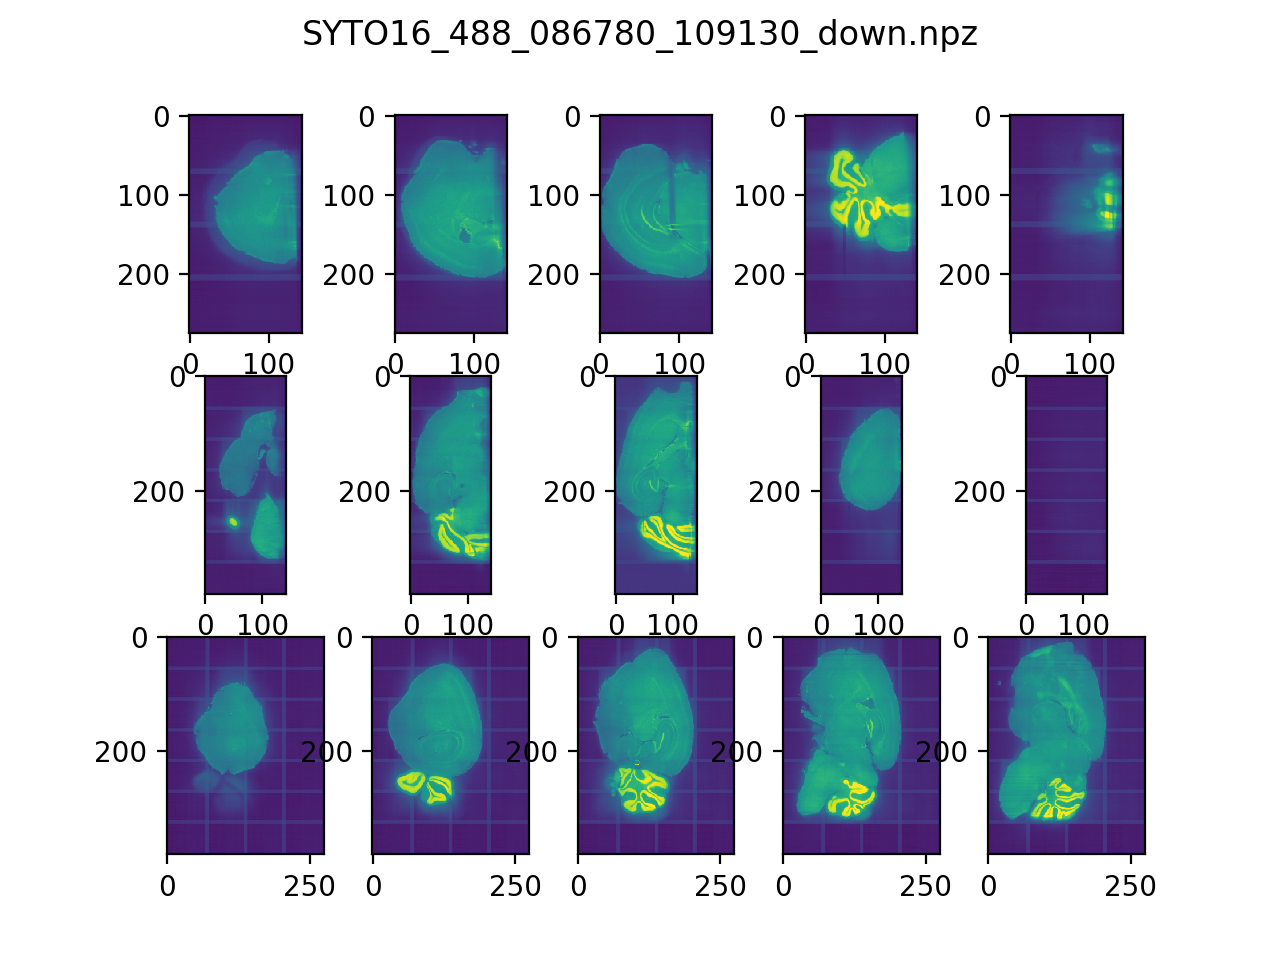

4294967296 4294967296


In [14]:
imp.reload(dw)
fig,ax = dw.draw_slices(Id,xId)
fig.suptitle(output_filename)
fig.savefig(output_filename.replace('npz','jpg'))

In [ ]:
xId